In [1]:
import pandas as pd
import src.search_functions as sf
import src.cleaning as cl
import os
import src.visualization as vz

In [2]:
# available conditions to search for:

num_emjpl = {"number_of_employees": {"$lt": 10000}}
founded_year = {"founded_year": {"$gt": 2007}}
money_raised_gt1M = {"total_money_raised": {"$regex": ".*[MB].*"}}
games_video = {"category_code": "games_video"}
web = {"category_code": "web"}
#web_and_games = {"category_code": ["games_video", "web"]}

In [3]:
q1_web_startups =sf.mongo_search(founded_year, money_raised_gt1M, web)
q1_web_startups.head(2)


,name,category_code,number_of_employees,founded_year,total_money_raised,city1,city2,lat,lon
0,Fixya,web,30.0,2013,$8M,San Mateo,None,37.566879,-122.323895
42,Tongxue,web,NaN,2013,$6M,None,None,N/A,N/A


In [4]:
q1_games_startups =sf.mongo_search(founded_year, money_raised_gt1M, games_video)
q1_games_startups.head(2)

,name,category_code,number_of_employees,founded_year,total_money_raised,city1,city2,lat,lon
1,Social Gaming Network,games_video,100.0,2011,$17.1M,Los Angeles,Beverly Hills,37.446823,-122.161523
6,Titan Gaming,games_video,18.0,2010,$1M,Santa Monica,None,53.544711,-113.515769


In [5]:
startup_top10_cities = cl.merge_and_get_top10_cities(q1_web_startups,q1_games_startups)

In [6]:
startup_top10_cities

,City,Count
0,San Francisco,14
1,New York,12
2,Palo Alto,5
3,London,4
4,San Mateo,3
5,Los Angeles,3
6,Menlo Park,3
7,Tel Aviv,3
8,Istanbul,3
9,South Pasadena,2


In [7]:
q2_game =sf.mongo_search(games_video)
q2_web =sf.mongo_search(web)
top10_cities=cl.merge_and_get_top10_cities(q2_game,q2_web)

In [8]:
cities = cl.merge_cities(startup_top10_cities,top10_cities)
cities

,City,Count_startups,Count_comp
0,San Francisco,14,274
1,New York,12,258
2,Palo Alto,5,64
3,London,4,140
4,Los Angeles,3,90


#### Finding the average coordinates from all games and video companies in a City which are 75km from city centre

In [9]:
SF_avg_coor = cl.get_avg_coordinates('San Francisco', 37.7749, -122.4194, q1_web_startups, q1_games_startups,q2_game,q2_web)
SF_avg_coor

(37.761929979999955, -122.39218991688902)

In [10]:
NY_avg_coor = cl.get_avg_coordinates ( 'New York',40.7128,-74.0060,q1_web_startups, q1_games_startups,q2_game,q2_web)
NY_avg_coor

(40.74314475163043, -73.98603873478262)

In [11]:
PA_avg_coor = cl.get_avg_coordinates ( 'Palo Alto',  37.4419,-122.1430,q1_web_startups, q1_games_startups,q2_game,q2_web)
PA_avg_coor

(37.453118378947366, -122.15274914035086)

In [12]:
LND_avg_coor = cl.get_avg_coordinates ( 'London',51.5074,-0.1278,q1_web_startups, q1_games_startups,q2_game,q2_web)
LND_avg_coor

(51.51345527285715, -0.1320104214285714)

In [13]:
LA_coord = cl.get_avg_coordinates ( 'Los Angeles', 34.0522,-118.2437,q1_web_startups, q1_games_startups,q2_game,q2_web)
LA_coord

(34.04855827746479, -118.35274467887322)

#### Finding the coordinates from all games and video companies in a City which are 75km from city centre 

In [14]:
SF_coord=cl.df_city_coordinates('San Francisco', 37.7749, -122.4194,q1_web_startups, q1_games_startups,q2_game,q2_web)

In [15]:
NY_coord=cl.df_city_coordinates( 'New York',40.7128,-74.0060,q1_web_startups, q1_games_startups,q2_game,q2_web)

In [16]:
PA_coord=cl.df_city_coordinates( 'Palo Alto',  37.4419,-122.1430,q1_web_startups, q1_games_startups,q2_game,q2_web)

In [17]:
LND_coord=cl.df_city_coordinates( 'London',51.5074,-0.1278,q1_web_startups, q1_games_startups,q2_game,q2_web)

In [18]:
LA_coord=cl.df_city_coordinates( 'Los Angeles', 34.0522,-118.2437,q1_web_startups, q1_games_startups,q2_game,q2_web)

#### Creating visual maps 

In [19]:
SF_map = vz.crear_mapa (37.761929979999955,-122.39218991688902, SF_coord,zoom = 13)
SF_map

In [20]:
NY_map = vz.crear_mapa (40.74314475163043, -73.98603873478262, NY_coord,zoom = 13)
NY_map

In [21]:
PA_map = vz.crear_mapa ( 37.453118378947366,  -122.15274914035086, PA_coord,zoom = 13)

In [22]:
LND_map = vz.crear_mapa (51.51689597746479, -0.1473155197183098, LND_coord,zoom = 13)

In [23]:
STB_SF = sf.requests_for_foursquare ('Starbucks', 37.761929979999955,-122.39218991688902, radius=1000, limit=5)

#### Quering for the rest of the data:
    first group: looking for those that should be closer than 500m
    1- vegan restaurants
    2- distance to the airport
    3- shcools
    4- bars
    5- Karaokes 
    6- dog hairdresser


In [24]:
queries = ('Starbucks','vegan restaurant','school', 'Pet Grooming', 'bar','karaoke')

In [25]:
SF_queries = sf.queries_for_a_city (37.761929979999955, -122.39218991688902, 'Starbucks','vegan restaurant','school', 'Pet Grooming', 'bar','karaoke', )

In [26]:
sf_queries = SF_queries.to_csv("data/sf_queries", index=False)

In [27]:
NY_queries = sf.queries_for_a_city (40.74314475163043, -73.98603873478262, 'Starbucks','vegan restaurant','school', 'Pet Grooming', 'bar','karaoke')

In [28]:
ny_queries = NY_queries.to_csv("data/ny_queries", index=False)

In [29]:
PA_queries = sf.queries_for_a_city (37.453118378947366, -122.15274914035086, 'Starbucks','vegan restaurant','school', 'Pet Grooming', 'bar','karaoke')

In [30]:
pa_queries = PA_queries.to_csv("data/pa_queries", index=False)

In [31]:
LND_queries = sf.queries_for_a_city (51.51689597746479, -0.1473155197183098, 'Starbucks', 'Pet Grooming','vegan restaurant','Middle School', 'Elementary School','bar','karaoke')

In [32]:
lnd_queries = LND_queries.to_csv("data/lnd_queries", index=False)

In [33]:
LA_queries = sf.queries_for_a_city (34.04855827746479, -118.35274467887322, 'Starbucks','vegan restaurant','school', 'Pet Grooming', 'bar','karaoke')


In [34]:
la_queries = LA_queries.to_csv("data/la_queries", index=False)

Now summarizing above queries in df to see average distance of each available category

In [35]:
SF_venues = cl.distance_venue_city (queries, SF_queries)
SF_venues

,avg_dist,category_qty
category,,
Pet Grooming,344.6,5
bar,117.0,5
school,256.2,5
vegan restaurant,417.5,4


In [36]:
NY_venues = cl.distance_venue_city (queries, NY_queries)
NY_venues

,avg_dist,category_qty
category,,
Pet Grooming,136.8,5
Starbucks,271.8,5
bar,68.6,5
karaoke,336.2,5
school,124.2,5
vegan restaurant,175.0,5


In [37]:
PA_venues = cl.distance_venue_city (queries, PA_queries)
PA_venues

,avg_dist,category_qty
category,,
bar,459.0,2


In [38]:
LND_venues = cl.distance_venue_city (queries, LND_queries)
LND_venues

,avg_dist,category_qty
category,,
Pet Grooming,93.600000,5
Starbucks,321.600000,5
bar,71.000000,5
karaoke,392.333333,3
school,333.333333,3
vegan restaurant,260.800000,5


In [39]:
LA_venues = cl.distance_venue_city (queries, LA_queries)
LA_venues

,avg_dist,category_qty
category,,
Pet Grooming,202.0,1
bar,83.8,5
school,227.6,5
vegan restaurant,97.0,1


Palo Alto is not longer an option as it lacks many of the requirements as well as LA

In a second step we search for the distance to a Basketball stadium and we accept a distance up to 10km for the 3 remaining cities

In [40]:
SF_bk = sf.requests_for_foursquare_relevance ( 'Basket Stadium',37.761929979999955,-122.39218991688902, radius=10000, limit=5)
SF_bk

,name,address,city,category,distance,lat,lon
0,Chase Center Stadium,1 Warriors Way,San Francisco,Basket Stadium,779,37.767924,-122.387478
1,Berry Basketball Courts,Berry St,San Francisco,Basket Stadium,1218,37.772080,-122.397686
2,Hayes Valley Playground Basketball Court,598 Linden St,San Francisco,Basket Stadium,3481,37.776378,-122.428260
3,Kezar Stadium,755 Stanyan St,San Francisco,Basket Stadium,5630,37.766929,-122.456078
4,Avalon Basketball Court,255 King St,San Francisco,Basket Stadium,1634,37.776857,-122.392878


In [41]:
NY_bk = sf.requests_for_foursquare_relevance ( 'Basket Stadium',40.74314475163043, -73.98603873478262, radius=15000, limit=10)
NY_bk

,name,address,city,category,distance,lat,lon
0,The Picnic Basket,65 W 37th St,New York,Basket Stadium,932,40.751699,-73.985928
1,Basketball Court,Stuyvesant Walk,New York,Basket Stadium,1311,40.732496,-73.979550
2,Chelsea Market Baskets,75 9th Ave,New York,Basket Stadium,1743,40.742069,-74.004810
3,The Picnic Basket,805 3rd Ave,New York,Basket Stadium,1896,40.755405,-73.970566
4,Stadium Goods Market Center,305 Canal St,New York,Basket Stadium,2908,40.719975,-74.001971
5,Le Basket,683 Broadway,New York,Basket Stadium,1853,40.727990,-73.994823
6,Kitchen Stadium,13 E 27th St,New York,Basket Stadium,91,40.743965,-73.986630
7,Served By Stadium,13 E 27th St,New York,Basket Stadium,101,40.745491,-73.978042
8,Icahn Stadium,20 Randalls Island,New York,Basket Stadium,7599,40.793256,-73.925393
9,Zaro's Bread Basket,625 8th Ave,New York,Basket Stadium,1499,40.756260,-73.990869


In [42]:
LND_bk = sf.requests_for_foursquare_relevance('Basketball',51.51689597746479, -0.1473155197183098, radius=10000, limit=5)
LND_bk

KeyError: 'results'

the results obtained do no fit the requirement, it is needed to check one by one in internet to verify if they fit.
After doing this we find out that:
   
   - San Francisco: 
        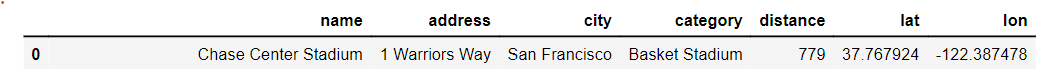
   
   - New York:
       non of the results within the top 10 relevance is a basketball stadium 
   
   - Lonndon:
        no basketball stadium in a radius of 10km

Finally we do the same with the International Airport within a radius of 50km

In [43]:
SF_ia = sf.requests_for_foursquare_relevance ( 'International Airport',37.761929979999955,-122.39218991688902, radius=50000, limit=5)
SF_ia

KeyError: 'address'

In [44]:
NY_ia = sf.requests_for_foursquare_relevance ( 'International Airport',40.74314475163043, -73.98603873478262, radius=60000, limit=10)
NY_ia

KeyError: 'address'

In [45]:
LND_ia = sf.requests_for_foursquare_relevance('International Airport',51.51689597746479, -0.1473155197183098, radius=50000, limit=5)
LND_ia

,name,address,city,category,distance,lat,lon
0,London Gatwick Airport,A23 Airport Way,Crawley,International Airport,39848,51.156710,-0.163651
1,London Heathrow Airport (LHR),"The Compass Centre, Nelson Rd",London,International Airport,22183,51.470022,-0.454296
2,London Luton Airport (LTN),"Navigation House, Airport Way",Luton,International Airport,42822,51.876265,-0.371747


As we have chosen London as the city in which strat the new company next plot resumes all the info in that city

In [46]:
LND_companies =cl.london_companies(q2_game,q2_web)

In [47]:
LND = cl.merge_LND_info(LND_companies, LND_queries)

In [48]:
LND['category'].value_counts()

category
web                 63
games_video         14
Starbucks            5
Pet Grooming         5
vegan restaurant     5
bar                  5
school               3
karaoke              3
Name: count, dtype: int64

In [49]:
lnd = LND.to_csv("data/lnd", index=False)


In [50]:
LND = pd.read_csv("lnd.csv")

In [52]:
LND_map =vz.city_map(LND)

In [53]:
LND_map